In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import shap


# Initial Cleaning and Analysis:

In [2]:
df_gen1 = pd.read_csv('Plant_1_Generation_Data.csv')
df_wea1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

df_gen2 = pd.read_csv('Plant_2_Generation_Data.csv')
df_wea2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [3]:
df_gen1.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

In [4]:
df_gen2.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [5]:
df_wea1.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

In [6]:
df_wea2.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

In [7]:
df_gen1.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [8]:
df_gen2.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [9]:
df_wea1.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [10]:
df_wea2.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

# At first glance:
    We see that power station 1 has a different date formatting than the rest, easy enough to handle. The most important observation to make is that power station 1 has a recorded max value for DC_POWER that is roughly a factor of 10 higher than power station 2. This could imply one of two things: 
### a)
    power station 1 loses roughly 90% of it's energy when converting to AC power.
###   b)
    The instruments at power station 1 are recording incorrectly.
    
    Looking at the total yield for each station we see that station 2 has 1e3 times more production generally implying it is an older installation and should have worse production. Furthermore, we see that the mean values for daily yeild and ac_power are nearly identical. The % loss from DC to AC conversion at station 2 is much more reasonable at ~2.5. Thus we assume that there is instrument error in recording DC_POWER at station 1, and should be scaled appropriately. 
    
    It is worth mentioning that these data sets are relatively straightforward and require minimal cleaning and manipulation.
    
    Also briefly looking at the weather data we see minor deviations in ambient temperature and module temperature which suggest several possibilities as well:
### a)
    The geography of the two locations is slightly different
### b) 
    The equipment at station 2 is older and artificially increasing temperature at it's location.
    
    The metrics of import thus far are AC,DC power, Daily yield. We cannot neglect to account for the weather information that has been recorded for each station. This has the potential for telling us so much about the behavior and condition of each inverter/the solar panels attached to each inverter.

In [11]:
def clean_time1(frame, col):
    frame[col] = pd.to_datetime(frame[col], format = '%d-%m-%Y %H:%M')
    frame['DATE'] = frame[col].apply(lambda x: x.date())
    frame['TIME'] = frame[col].apply(lambda x: x.time())
    frame['HOUR'] = pd.to_datetime(frame['TIME'],format='%H:%M:%S').dt.hour
    frame['MINUTE'] = pd.to_datetime(frame['TIME'],format='%H:%M:%S').dt.minute
    frame = frame.drop([col,'PLANT_ID','TIME'],axis = 1)
    return frame

def clean_time2(frame, col):
    frame[col] = pd.to_datetime(frame[col], format = '%Y-%m-%d %H:%M')
    frame['DATE'] = frame[col].apply(lambda x: x.date())
    frame['TIME'] = frame[col].apply(lambda x: x.time())
    frame['HOUR'] = pd.to_datetime(frame['TIME'],format='%H:%M:%S').dt.hour
    frame['MINUTE'] = pd.to_datetime(frame['TIME'],format='%H:%M:%S').dt.minute
    frame[col] = frame[col].dt.floor('H')
    frame = frame.drop([col,'PLANT_ID','TIME'],axis = 1)
    return frame

In [12]:
df_gen1['DC_POWER'] = df_gen1['DC_POWER']/10 #rescaling of data

In [13]:
df_gen1 = clean_time1(df_gen1,'DATE_TIME')
df_wea1 = clean_time2(df_wea1,'DATE_TIME').drop(['SOURCE_KEY'],axis=1)

In [14]:
result1 = pd.merge(df_gen1, df_wea1, how='outer', on=['DATE','HOUR','MINUTE']).dropna()
result1

SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0      1BY6WEcLGh8j5v7       0.0       0.0        0.000    6259559.0   
1      1IF53ai7Xc0U56Y       0.0       0.0        0.000    6183645.0   
2      3PZuoBAID5Wc2HD       0.0       0.0        0.000    6987759.0   
3      7JYdWkrLSPkdwr4       0.0       0.0        0.000    7602960.0   
4      McdE0feGgRqW7Ca       0.0       0.0        0.000    7158964.0   
...                ...       ...       ...          ...          ...   
68773  uHbuxQJl8lW7ozc       0.0       0.0     5967.000    7287002.0   
68774  wCURE6d3bPkepu2       0.0       0.0     5147.625    7028601.0   
68775  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000    7251204.0   
68776  zBIq5rxdHJRwDNY       0.0       0.0     5817.000    6583369.0   
68777  zVJPv84UY57bAof       0.0       0.0     5910.000    7363272.0   

             DATE  HOUR  MINUTE  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0      2020-05-15     0       0            25.184316           22.857507   
1      2020-05-15     0       0            25.184316           22.857507   
2      2020-05-15     0       0            25.184316           22.857507   
3      2020-05-15     0       0            25.184316           22.857507   
4      2020-05-15     0       0            25.184316           22.857507   
...           ...   ...     ...                  ...                 ...   
68773  2020-06-17    23      45            21.909288           20.427972   
68774  2020-06-17    23      45            21.909288           20.427972   
68775  2020-06-17    23      45            21.909288           20.427972   
68776  2020-06-17    23      45            21.909288           20.427972   
68777  2020-06-17    23      45            21.909288           20.427972   

       IRRADIATION  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
68773          0.0  
68774          0.0  
68775          0.0  
68776          0.0  
68777          0.0  

[68774 rows x 11 columns]

Through the merge we produced and dropped 4 entries, not worried about that at all.

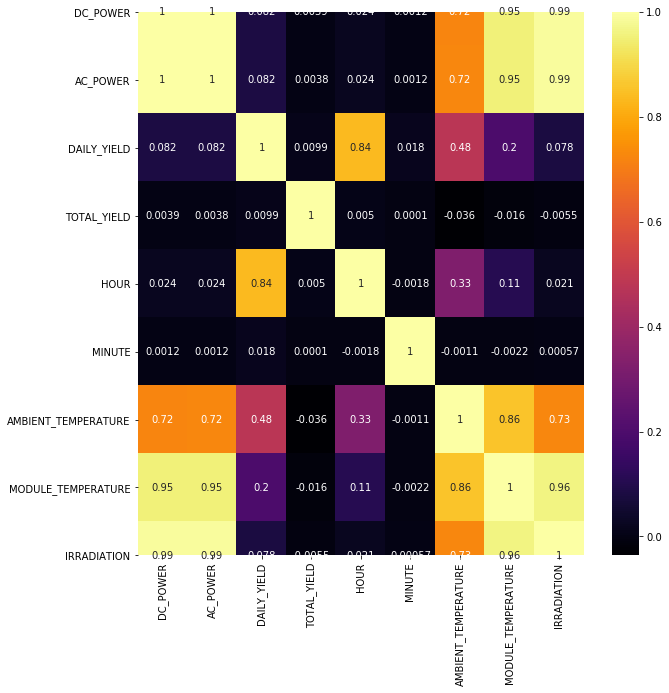

In [15]:
plt.figure(figsize=(10,10))
c = result1.corr(method='pearson')
sns.heatmap(c,cmap='inferno',annot=True)

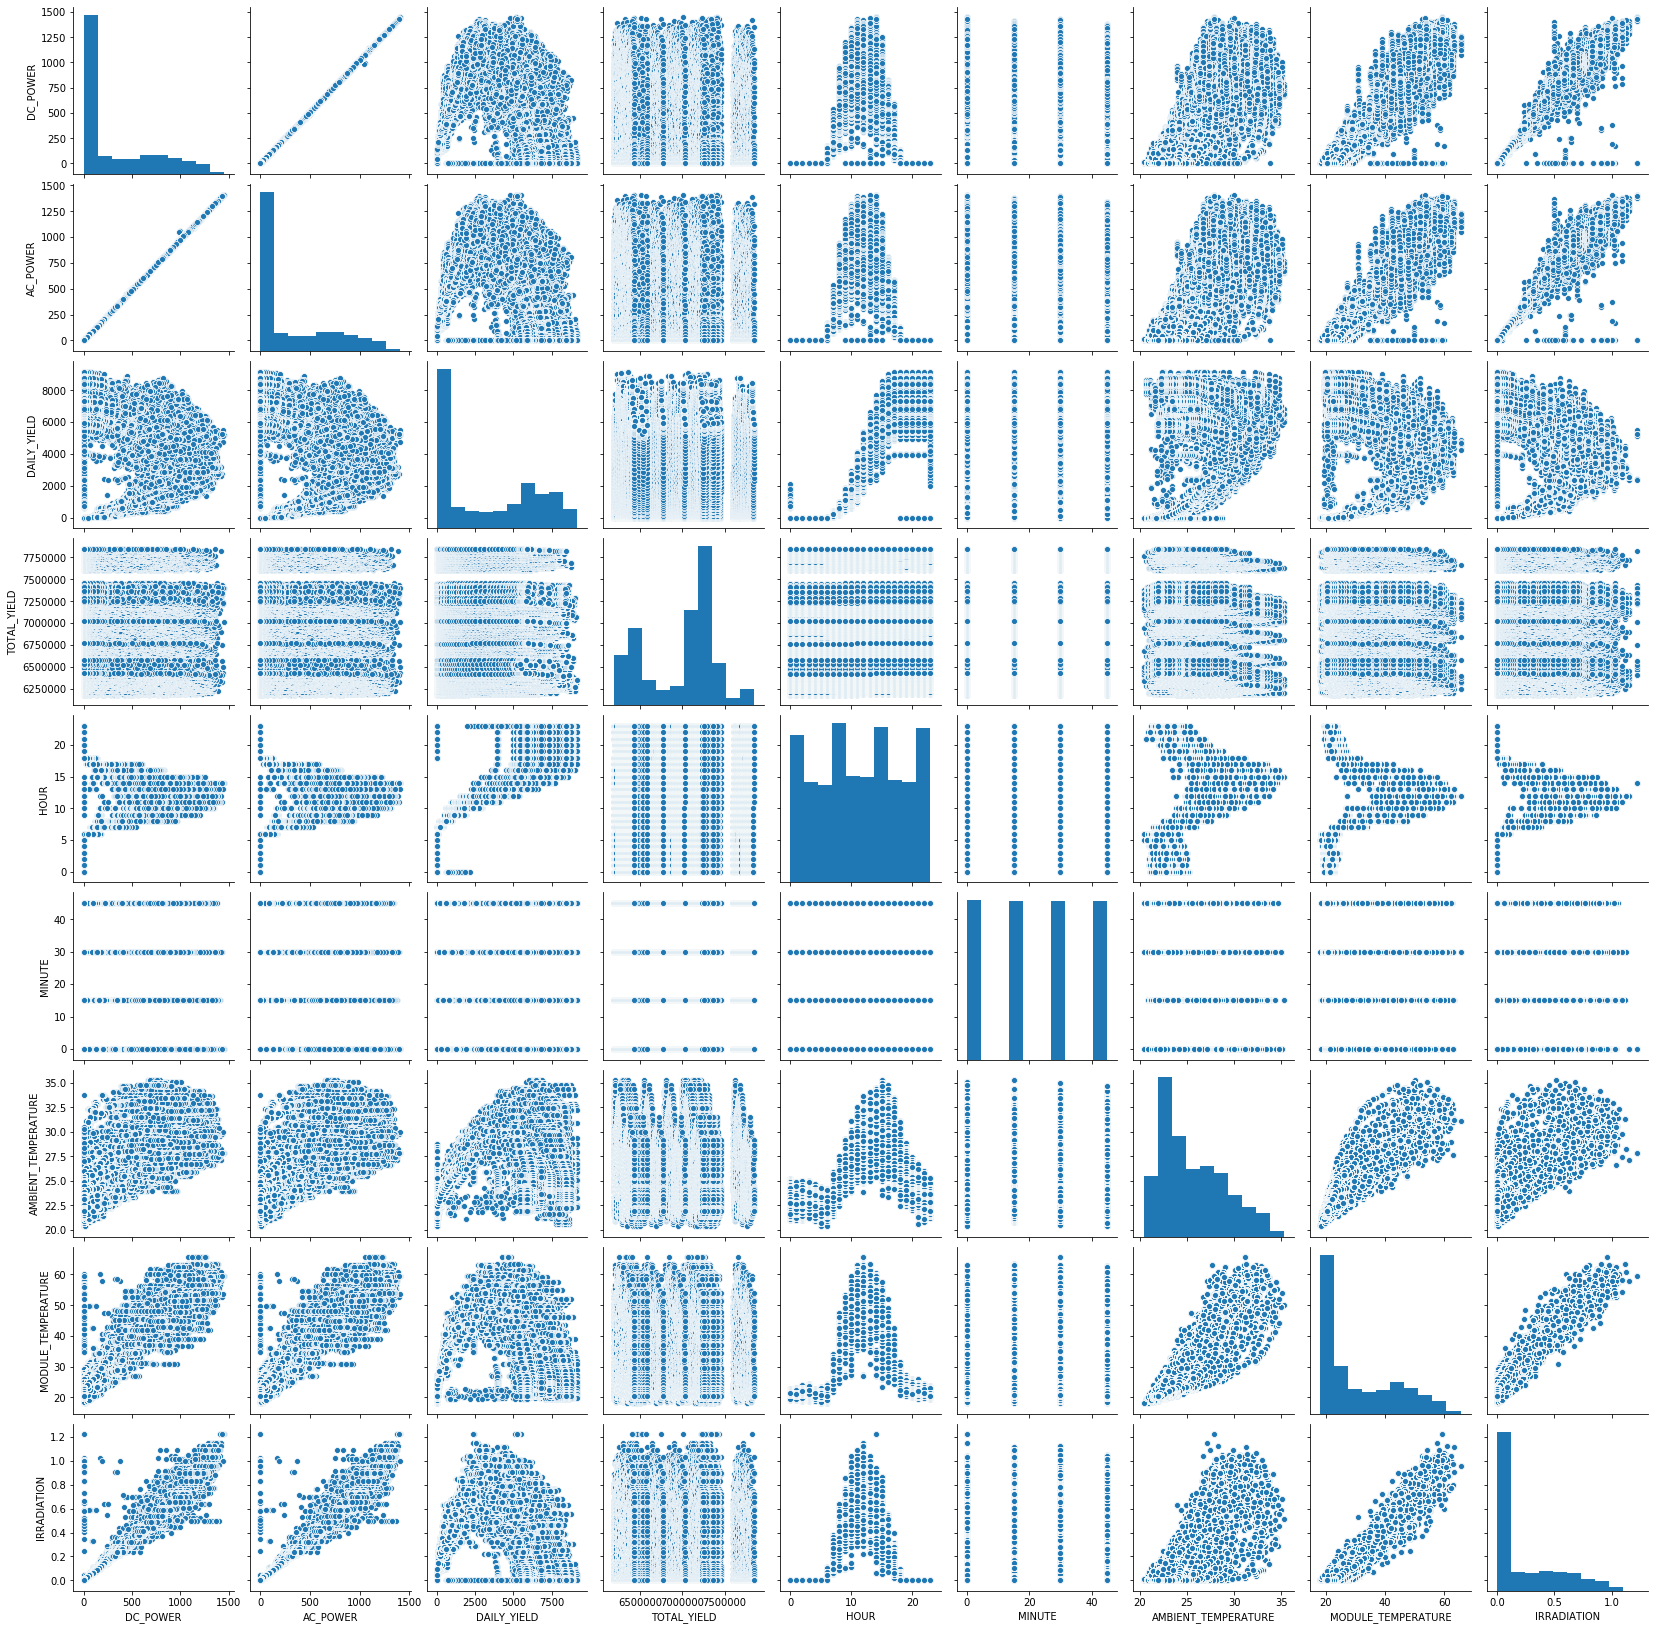

In [16]:
sns.pairplot(data = result1)

By combining the power generation data and the weather information recorded at each station we see that irradiance has a periodic pattern with useful information in daylight hours. We see a strong correlation between irradiance and module temperature, AC_POWER, and DC_POWER. There is further correlation between ambient temperature and irradiance, but module temperature appears to have a greater influence on ambient temperature. The data for temperature, irradiation as well as AC/DC power all follow a periodic pattern based on sun exposure.

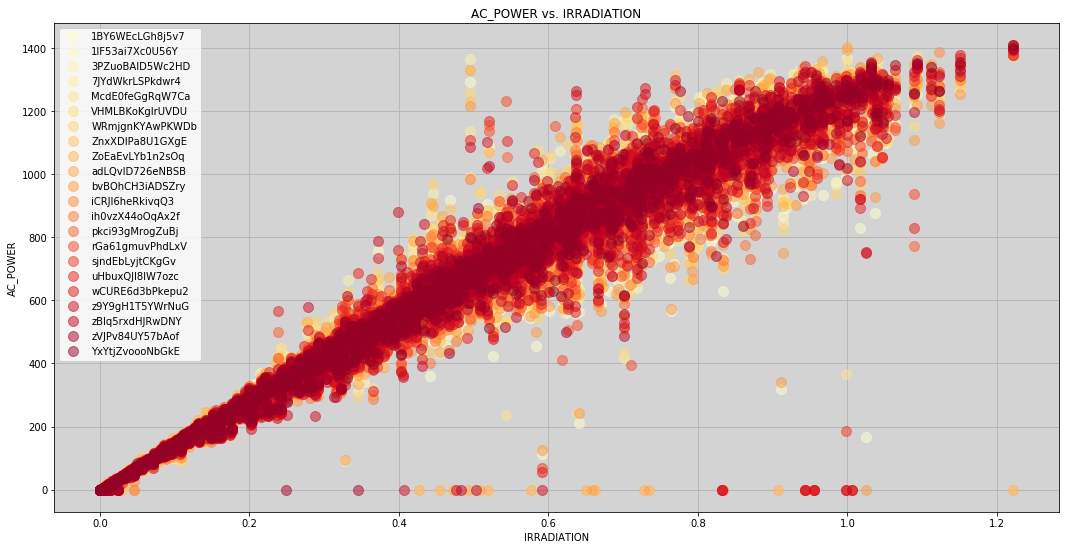

In [17]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))
inverter = result1.SOURCE_KEY.unique()
NUM_colors = len(inverter)
cm = plt.get_cmap('YlOrRd')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for pi in inverter:
    data = result1[(result1['SOURCE_KEY'] == pi)]
    
    ax.plot(data.IRRADIATION,
           data.AC_POWER,
           marker = 'o',
           linestyle='',
           alpha=.5,
           ms = 10,
           label = pi)
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('AC_POWER vs. IRRADIATION')
plt.xlabel('IRRADIATION')
plt.ylabel('AC_POWER')
plt.show()

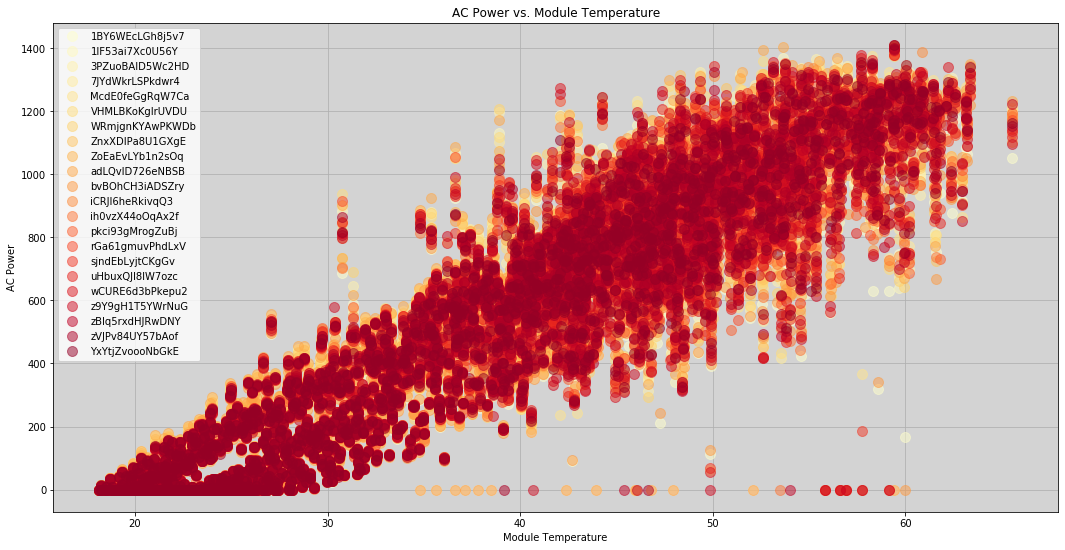

In [18]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))
inverter = result1.SOURCE_KEY.unique()
NUM_colors = len(inverter)
cm = plt.get_cmap('YlOrRd')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for pi in inverter:
    data = result1[(result1['SOURCE_KEY'] == pi)]
    
    ax.plot(data.MODULE_TEMPERATURE,
           data.AC_POWER,
           marker = 'o',
           linestyle='',
           alpha=.5,
           ms = 10,
           label = pi)
ax.grid()
ax.margins(0.05)
ax.legend()
plt.title('AC Power vs. Module Temperature')
plt.xlabel('Module Temperature')
plt.ylabel('AC Power')
plt.show()

Taking a closer look at the relationship of AC_POWER to irradiance and module temperature we see a fair amount of variability with some outlying data that potentially suggests certain inverters are producing less power or malfunctioning on certain dates.

## Malfunctioning/Under performing

In [19]:
gen1_keys = result1.SOURCE_KEY.unique()
date_list = result1.DATE.unique()

In [20]:
def inverter_comp1():
    main_df = pd.DataFrame()
    for day in date_list:
        df = df_gen1[(df_gen1['DATE']== day)][-len(gen1_keys):]
        df = df.drop(['DC_POWER','AC_POWER','TOTAL_YIELD'],axis= 1)
        df = df[df['DAILY_YIELD']!=0]
        main_df = main_df.append(df,ignore_index=True)
    return main_df
inverter_data = inverter_comp1()

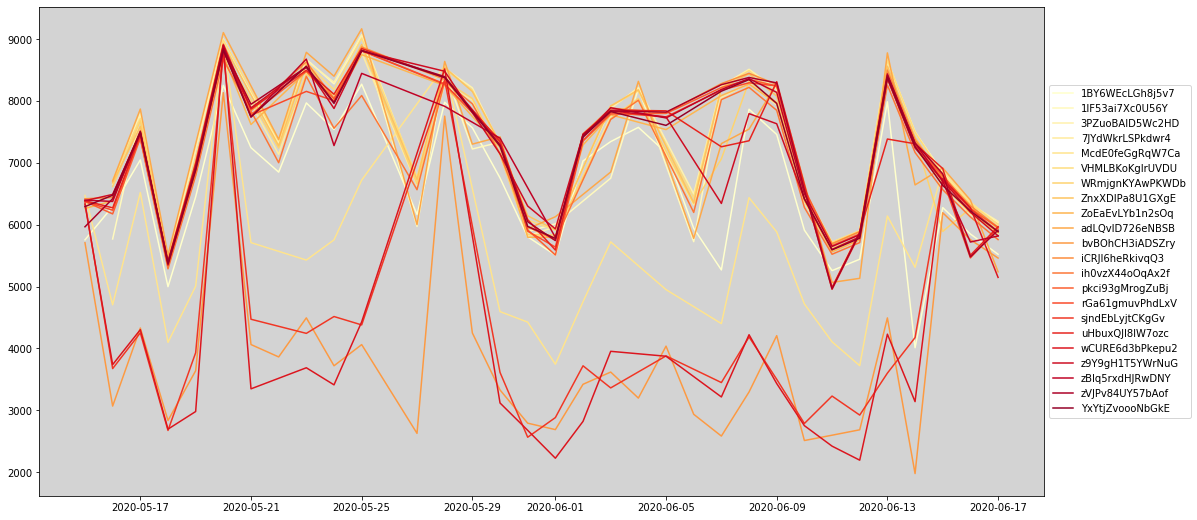

In [21]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(gen1_keys)
cm = plt.get_cmap('YlOrRd')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in gen1_keys:
    df = inverter_data[inverter_data['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.show()

In [22]:
mal_keys1 = inverter_data[(inverter_data['DATE']==date_list[2])&(inverter_data['DAILY_YIELD']<6900)].SOURCE_KEY.unique()
mal_keys1

array(['McdE0feGgRqW7Ca', 'bvBOhCH3iADSZry', 'sjndEbLyjtCKgGv',
       'wCURE6d3bPkepu2'], dtype=object)

Overlaying the daily yield allows us to identify four inverters with numbers suggesting a chronic underproduction of power with occassional spikes.

In [23]:
for key in mal_keys1:
    inverter_data = inverter_data[inverter_data.SOURCE_KEY!=key]
inverter_data.head(5)

SOURCE_KEY  DAILY_YIELD        DATE  HOUR  MINUTE
0  1BY6WEcLGh8j5v7       5754.0  2020-05-15    23       0
2  YxYtjZvoooNbGkE       6291.0  2020-05-15    23       0
3  ZoEaEvLYb1n2sOq       6261.0  2020-05-15    23       0
5  iCRJl6heRkivqQ3       6418.0  2020-05-15    23       0
6  pkci93gMrogZuBj       6375.0  2020-05-15    23       0

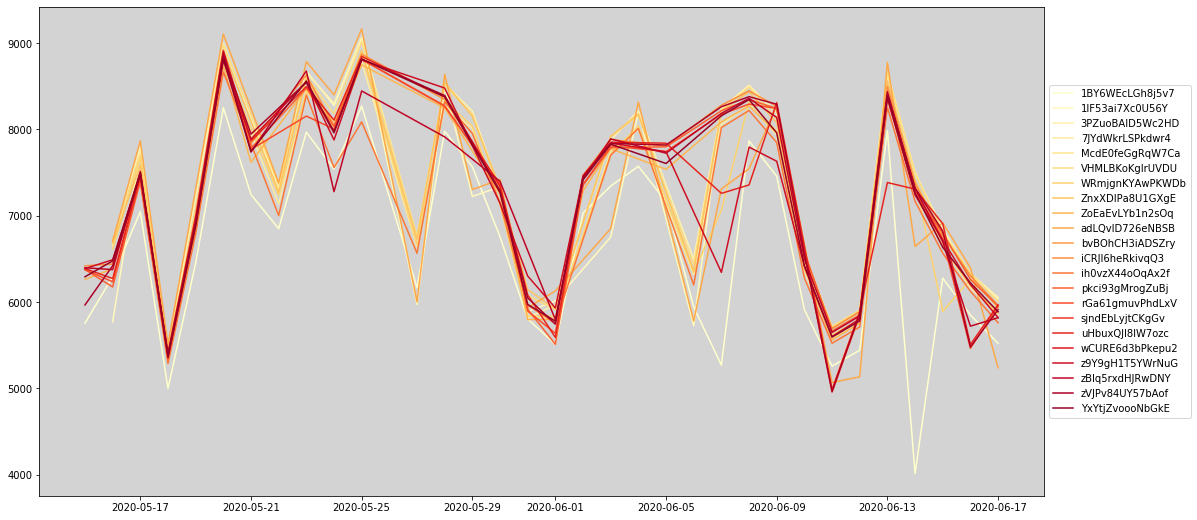

In [24]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(gen1_keys)
cm = plt.get_cmap('YlOrRd')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in gen1_keys:
    df = inverter_data[inverter_data['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.show()

Filtering for the inverters that consistently underproduce provides better insight into what the production values should be. It shows further variability in daily production values and further decline in production by inverter 1BY... as time goes on. 

# Further Cleaning

In [25]:
result1.head()

SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD        DATE  \
0  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0  2020-05-15   
1  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0  2020-05-15   
2  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0  2020-05-15   
3  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0  2020-05-15   
4  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0  2020-05-15   

   HOUR  MINUTE  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0     0       0            25.184316           22.857507          0.0  
1     0       0            25.184316           22.857507          0.0  
2     0       0            25.184316           22.857507          0.0  
3     0       0            25.184316           22.857507          0.0  
4     0       0            25.184316           22.857507          0.0

Recalling the earlier potential correlation between hour and DAILY yield as well as the strong correlation, it is important to investigate the data at an hourly level.

In [26]:
acdchr = result1.groupby(['SOURCE_KEY','DATE','HOUR'])[['DC_POWER','AC_POWER']].agg('sum').reset_index()
irrhr = result1.groupby(['SOURCE_KEY','DATE','HOUR'])[['IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].agg('mean').reset_index()
res1_max = result1.groupby(['SOURCE_KEY','DATE','HOUR'])[['DAILY_YIELD','TOTAL_YIELD']].agg('max').reset_index()

In [27]:
step1 = pd.merge(acdchr, irrhr, how='outer', on =['SOURCE_KEY','DATE','HOUR'])
res1_info = pd.merge(step1, res1_max, how='outer', on =['SOURCE_KEY','DATE','HOUR'])
res1_info

SOURCE_KEY        DATE  HOUR  DC_POWER  AC_POWER  IRRADIATION  \
0      1BY6WEcLGh8j5v7  2020-05-15     0       0.0       0.0          0.0   
1      1BY6WEcLGh8j5v7  2020-05-15     1       0.0       0.0          0.0   
2      1BY6WEcLGh8j5v7  2020-05-15     2       0.0       0.0          0.0   
3      1BY6WEcLGh8j5v7  2020-05-15     3       0.0       0.0          0.0   
4      1BY6WEcLGh8j5v7  2020-05-15     4       0.0       0.0          0.0   
...                ...         ...   ...       ...       ...          ...   
17432  zVJPv84UY57bAof  2020-06-17    19       0.0       0.0          0.0   
17433  zVJPv84UY57bAof  2020-06-17    20       0.0       0.0          0.0   
17434  zVJPv84UY57bAof  2020-06-17    21       0.0       0.0          0.0   
17435  zVJPv84UY57bAof  2020-06-17    22       0.0       0.0          0.0   
17436  zVJPv84UY57bAof  2020-06-17    23       0.0       0.0          0.0   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  DAILY_YIELD  TOTAL_YIELD  
0                25.012697           22.643083          0.0    6259559.0  
1                24.667328           22.411960          0.0    6259559.0  
2                24.986837           23.512072          0.0    6259559.0  
3                24.954589           24.126433          0.0    6259559.0  
4                24.276670           22.133106          0.0    6259559.0  
...                    ...                 ...          ...          ...  
17432            23.367776           22.418035       5910.0    7363272.0  
17433            22.918254           21.024839       5910.0    7363272.0  
17434            22.981533           21.735511       5910.0    7363272.0  
17435            22.271179           21.060298       5910.0    7363272.0  
17436            22.004218           20.815293       5910.0    7363272.0  

[17437 rows x 10 columns]

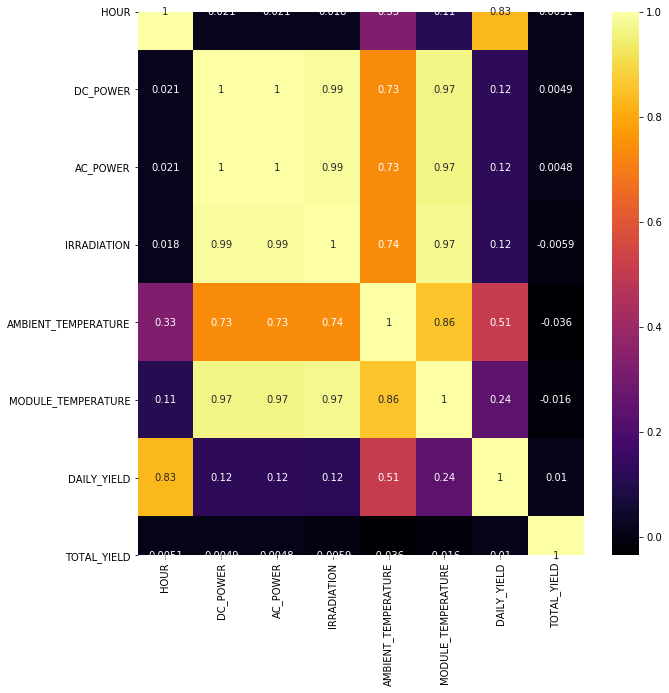

In [28]:
plt.figure(figsize=(10,10))
c = res1_info.corr(method='pearson')
sns.heatmap(c,cmap='inferno',annot=True)

On an hourly level we see much the same as we did before. Strong linear correlation in most areas with respect to irradiation, and little to no correlation with respect to totaly yield or hour. However that being said we see the same periodic pattern following hourly irradiation.

Considering this there are multiple questions that we can ask:

If we consider the mean values of irradiance, AC/DC_POWER, AMBIENT/MODULE_temperatues as values that can be forecasted similar to weather can we accurately predict the total daily yield for a given inverter for the next several days?

Additionaly, can we use weather data as well as physical module data to predict the hourly AC_POWER for the next several days?

In [29]:
res1_means = result1.groupby(['SOURCE_KEY','DATE'])[['AC_POWER','DC_POWER','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','IRRADIATION']].agg('mean').reset_index()
res1_max2 = result1.groupby(['SOURCE_KEY','DATE'])[['DAILY_YIELD']].agg('max').reset_index()
res1_information = pd.merge(res1_means, res1_max2, how='outer', on=['SOURCE_KEY','DATE'])
res1_information

SOURCE_KEY        DATE    AC_POWER    DC_POWER  MODULE_TEMPERATURE  \
0    1BY6WEcLGh8j5v7  2020-05-15  247.812372  253.054512           32.582964   
1    1BY6WEcLGh8j5v7  2020-05-16  285.505580  291.624858           31.858851   
2    1BY6WEcLGh8j5v7  2020-05-17  293.467187  300.041481           32.740435   
3    1BY6WEcLGh8j5v7  2020-05-18  208.026116  212.531566           27.814344   
4    1BY6WEcLGh8j5v7  2020-05-19  244.528783  249.760503           29.725163   
..               ...         ...         ...         ...                 ...   
743  zVJPv84UY57bAof  2020-06-13  345.271019  353.333278           30.481026   
744  zVJPv84UY57bAof  2020-06-14  305.418062  312.013263           29.421707   
745  zVJPv84UY57bAof  2020-06-15  285.134654  291.455822           29.927817   
746  zVJPv84UY57bAof  2020-06-16  260.423214  266.038058           29.555567   
747  zVJPv84UY57bAof  2020-06-17  252.889814  258.431239           28.522974   

     AMBIENT_TEMPERATURE  IRRADIATION  DAILY_YIELD  
0              27.430823     0.204699       5754.0  
1              26.780538     0.211951       6292.0  
2              26.686727     0.238869       7045.0  
3              23.850938     0.159026       4998.0  
4              25.338021     0.194031       6449.0  
..                   ...          ...          ...  
743            24.566729     0.264472       8410.0  
744            24.412891     0.220086       7320.0  
745            24.827414     0.205925       6820.0  
746            24.928929     0.187283       6262.0  
747            24.273244     0.180157       5910.0  

[748 rows x 8 columns]

## Hypothesis 1:


    HA: Mean production rates and meteorological data associated to maximal energy production for each inverter unit per day can allow for accurate predictions of future production values based on projected meteorological data.
    
    H0: They do not allow for accurate predictions.
    

In [30]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
label_encoder = preprocessing.LabelEncoder()

In [31]:
res1_information['SOURCE_KEY'] = label_encoder.fit_transform(res1_information['SOURCE_KEY'])

In [32]:
def fourwks_n(df,nforward):
    num_days = df.DATE.unique()
    test_df = pd.DataFrame()
    prediction_df = pd.DataFrame()
    
    for i in range(0,28):
        toss_df1 = pd.DataFrame()
        toss_df1 = df[df['DATE']==num_days[i]]
        test_df = test_df.append(toss_df1)
    for j in range(28,28+nforward):
        toss_df2 = pd.DataFrame()
        toss_df2 = df[df['DATE']==num_days[j]]
        prediction_df = prediction_df.append(toss_df2)
        
    return test_df, prediction_df

In [33]:
model_data, external_data = fourwks_n(res1_information,4)#attempting to split data such that we can predict the next four days

In [34]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [35]:
X = res1_information[['SOURCE_KEY','IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','DC_POWER','AC_POWER']]
y = res1_information[['DAILY_YIELD']]




X_in = model_data[['SOURCE_KEY','IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','DC_POWER','AC_POWER']]
y_in = model_data[['DAILY_YIELD']]
X_external = external_data[['SOURCE_KEY','IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','DC_POWER','AC_POWER']]
y_external = external_data[['DAILY_YIELD']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Here we have split the data into two groups. First we have the complete data set on which we can test how well we can predict the daily yield with all 32 days of information.

Second we have split the data into the first 28 days and the last 4 days, where we develop our model with the first 28 days and then test on the 4 days that have been withheld where the data is assumed to be mean values that have been 'forecasted' to see how well a model can predict the daily yeild.

First we will see how well a simple Linear Regression will handle the entirety of the dataset without any tuning of parameters.

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE: 449.66762380750606


In [38]:
data_matrix = xgb.DMatrix(data=X, label=y)

Next we perform a k-fold cross validation to see how well this can be increased

In [39]:
params = {"objective":"reg:squarederror",'colsample_bytree':0.5,'learning_rate':0.16,
         'max_depth':10,'alpha':10,'min_child_weight':5}

cv_results = xgb.cv(dtrain = data_matrix,params=params, nfold=10,
                   num_boost_round=5000,early_stopping_rounds=50,
                   metrics="rmse", as_pandas=True,seed=1)

In [40]:
cv_results.tail(1)

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
557         3.451462        0.256053       97.815873      40.116813

In [41]:
xgb_reg = xgb.XGBRegressor(n_estimators=5000, objective='reg:squarederror',learning_rate=0.16,colsample_bytree = 0.5, max_depth=5, min_child_weight = 5, alpha =10)
xgb_reg.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=50)

[0]	validation_0-rmse:6103.90772	validation_1-rmse:6150.37061
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:5137.45068	validation_1-rmse:5175.50439
[2]	validation_0-rmse:4325.31494	validation_1-rmse:4356.44238
[3]	validation_0-rmse:3642.77173	validation_1-rmse:3667.00220
[4]	validation_0-rmse:3070.39014	validation_1-rmse:3088.91675
[5]	validation_0-rmse:2588.75391	validation_1-rmse:2599.65845
[6]	validation_0-rmse:2184.51880	validation_1-rmse:2189.88574
[7]	validation_0-rmse:1845.90247	validation_1-rmse:1843.47669
[8]	validation_0-rmse:1559.23181	validation_1-rmse:1552.72900
[9]	validation_0-rmse:1319.30933	validation_1-rmse:1310.78503
[10]	validation_0-rmse:1116.30725	validation_1-rmse:1107.00879
[11]	validation_0-rmse:945.37665	validation_1-rmse:931.99292
[12]	validation_0-rmse:802.41638	validation_1-rmse:791.39594
[13]	validation_0-rmse:682.12549	val

[134]	validation_0-rmse:37.56233	validation_1-rmse:92.34021
[135]	validation_0-rmse:37.22946	validation_1-rmse:92.21069
[136]	validation_0-rmse:36.87899	validation_1-rmse:92.04688
[137]	validation_0-rmse:36.46650	validation_1-rmse:92.09750
[138]	validation_0-rmse:36.27217	validation_1-rmse:92.16493
[139]	validation_0-rmse:36.09170	validation_1-rmse:92.13185
[140]	validation_0-rmse:35.95892	validation_1-rmse:92.21616
[141]	validation_0-rmse:35.81904	validation_1-rmse:92.12466
[142]	validation_0-rmse:35.73289	validation_1-rmse:91.97444
[143]	validation_0-rmse:35.61910	validation_1-rmse:91.92550
[144]	validation_0-rmse:35.51989	validation_1-rmse:91.98705
[145]	validation_0-rmse:35.46475	validation_1-rmse:91.99364
[146]	validation_0-rmse:35.33139	validation_1-rmse:91.94960
[147]	validation_0-rmse:35.27229	validation_1-rmse:92.01762
[148]	validation_0-rmse:34.83703	validation_1-rmse:91.55235
[149]	validation_0-rmse:34.58737	validation_1-rmse:91.56390
[150]	validation_0-rmse:34.24017	validat

[271]	validation_0-rmse:23.49358	validation_1-rmse:88.30476
[272]	validation_0-rmse:23.47926	validation_1-rmse:88.28829
[273]	validation_0-rmse:23.32846	validation_1-rmse:88.22459
[274]	validation_0-rmse:23.27288	validation_1-rmse:88.27690
[275]	validation_0-rmse:23.15941	validation_1-rmse:88.20425
[276]	validation_0-rmse:23.13164	validation_1-rmse:88.16990
[277]	validation_0-rmse:23.07728	validation_1-rmse:88.14870
[278]	validation_0-rmse:22.89754	validation_1-rmse:88.09293
[279]	validation_0-rmse:22.83727	validation_1-rmse:88.06044
[280]	validation_0-rmse:22.76776	validation_1-rmse:88.11971
[281]	validation_0-rmse:22.71246	validation_1-rmse:88.18990
[282]	validation_0-rmse:22.68846	validation_1-rmse:88.15310
[283]	validation_0-rmse:22.66541	validation_1-rmse:88.05005
[284]	validation_0-rmse:22.54275	validation_1-rmse:87.97457
[285]	validation_0-rmse:22.52560	validation_1-rmse:87.91708
[286]	validation_0-rmse:22.44966	validation_1-rmse:87.88376
[287]	validation_0-rmse:22.40041	validat

[408]	validation_0-rmse:16.09748	validation_1-rmse:86.17896
[409]	validation_0-rmse:16.03776	validation_1-rmse:86.20300
[410]	validation_0-rmse:16.01973	validation_1-rmse:86.23289
[411]	validation_0-rmse:16.01015	validation_1-rmse:86.22012
[412]	validation_0-rmse:15.99850	validation_1-rmse:86.19951
[413]	validation_0-rmse:15.95067	validation_1-rmse:86.21796
[414]	validation_0-rmse:15.89489	validation_1-rmse:86.20915
[415]	validation_0-rmse:15.88332	validation_1-rmse:86.23473
[416]	validation_0-rmse:15.81376	validation_1-rmse:86.24791
[417]	validation_0-rmse:15.79423	validation_1-rmse:86.23392
[418]	validation_0-rmse:15.76479	validation_1-rmse:86.21046
[419]	validation_0-rmse:15.74541	validation_1-rmse:86.24841
[420]	validation_0-rmse:15.71460	validation_1-rmse:86.23293
[421]	validation_0-rmse:15.67675	validation_1-rmse:86.25961
[422]	validation_0-rmse:15.64061	validation_1-rmse:86.20770
[423]	validation_0-rmse:15.62030	validation_1-rmse:86.18089
[424]	validation_0-rmse:15.56654	validat

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.16, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
from sklearn.metrics import r2_score

In [46]:
predictions = xgb_reg.predict(X_test)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,predictions))),r2_score(y_test,predictions))

RMSE: 85.94945453332754 0.9930007752477796


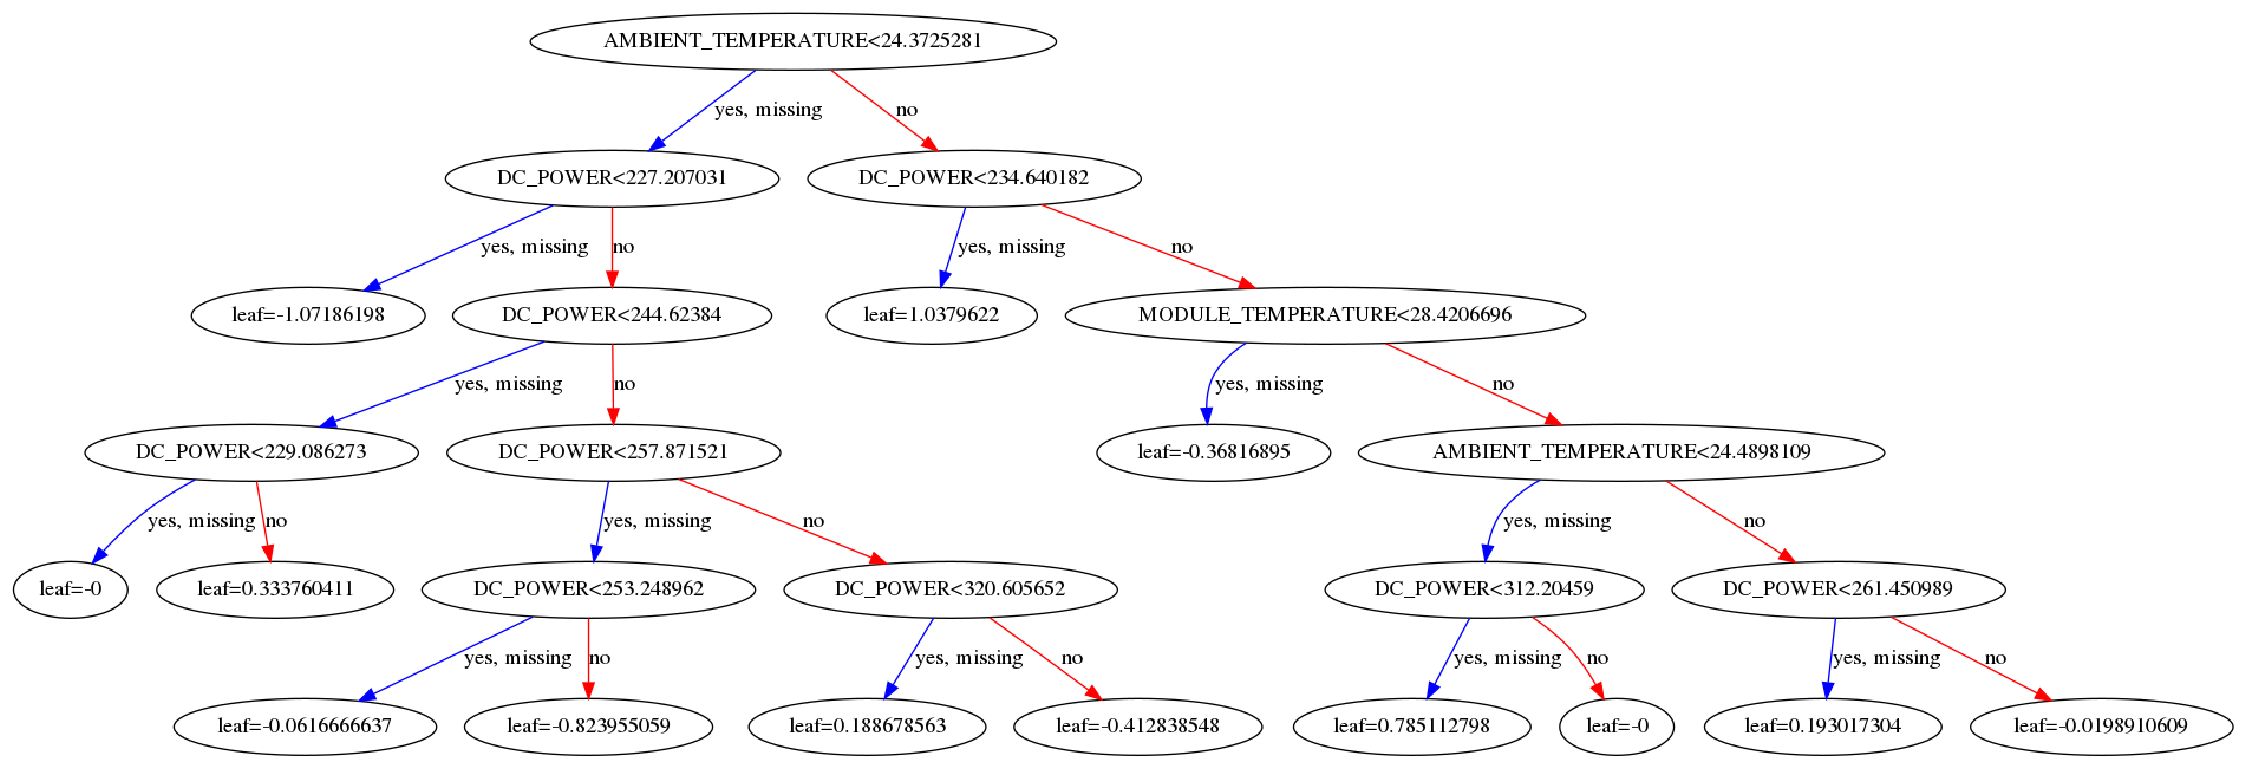

In [51]:
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(xgb_reg, num_trees=394, ax=ax)
plt.show()

For the entirety of the data we have a high r2-score and a comparatively low RMSE. Next we develop the model for the first 4 weeks of data to predict the last 4 days.

In [52]:
xgbreg = xgb.XGBRegressor(n_estimators=5000, objective='reg:squarederror',learning_rate=0.16,colsample_bytree = 0.5, max_depth=6, min_child_weight = 5)
xgbreg.fit(X_in, y_in, eval_set=[(X_in,y_in),(X_external,y_external)],early_stopping_rounds=50)

[0]	validation_0-rmse:6201.61377	validation_1-rmse:5964.87549
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:5218.71582	validation_1-rmse:5027.54492
[2]	validation_0-rmse:4393.53320	validation_1-rmse:4275.35303
[3]	validation_0-rmse:3699.71582	validation_1-rmse:3617.49976
[4]	validation_0-rmse:3117.79712	validation_1-rmse:3080.90771
[5]	validation_0-rmse:2629.03931	validation_1-rmse:2623.40112
[6]	validation_0-rmse:2217.48462	validation_1-rmse:2231.53833
[7]	validation_0-rmse:1872.83203	validation_1-rmse:1892.90344
[8]	validation_0-rmse:1583.15454	validation_1-rmse:1617.97864
[9]	validation_0-rmse:1339.12036	validation_1-rmse:1366.99182
[10]	validation_0-rmse:1133.45801	validation_1-rmse:1176.10315
[11]	validation_0-rmse:960.58862	validation_1-rmse:1021.15656
[12]	validation_0-rmse:815.36261	validation_1-rmse:877.14710
[13]	validation_0-rmse:693.26062	va

[133]	validation_0-rmse:29.37673	validation_1-rmse:240.36259
[134]	validation_0-rmse:29.25835	validation_1-rmse:240.35704
[135]	validation_0-rmse:29.11552	validation_1-rmse:240.27084
[136]	validation_0-rmse:28.95476	validation_1-rmse:240.05940
[137]	validation_0-rmse:28.67046	validation_1-rmse:240.08530
[138]	validation_0-rmse:28.56833	validation_1-rmse:239.87279
[139]	validation_0-rmse:28.49972	validation_1-rmse:240.14160
[140]	validation_0-rmse:28.46507	validation_1-rmse:239.96753
[141]	validation_0-rmse:28.36789	validation_1-rmse:240.25191
[142]	validation_0-rmse:28.29420	validation_1-rmse:240.23303
[143]	validation_0-rmse:28.12258	validation_1-rmse:240.02750
[144]	validation_0-rmse:28.04796	validation_1-rmse:239.73967
[145]	validation_0-rmse:27.97479	validation_1-rmse:239.80183
[146]	validation_0-rmse:27.89559	validation_1-rmse:239.74907
[147]	validation_0-rmse:27.85822	validation_1-rmse:239.74948
[148]	validation_0-rmse:27.82838	validation_1-rmse:239.85829
[149]	validation_0-rmse:

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.16, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
preds = xgbreg.predict(X_external)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_external,preds))),r2_score(y_external,preds))

RMSE: 239.15365008950593 0.9499059840501397


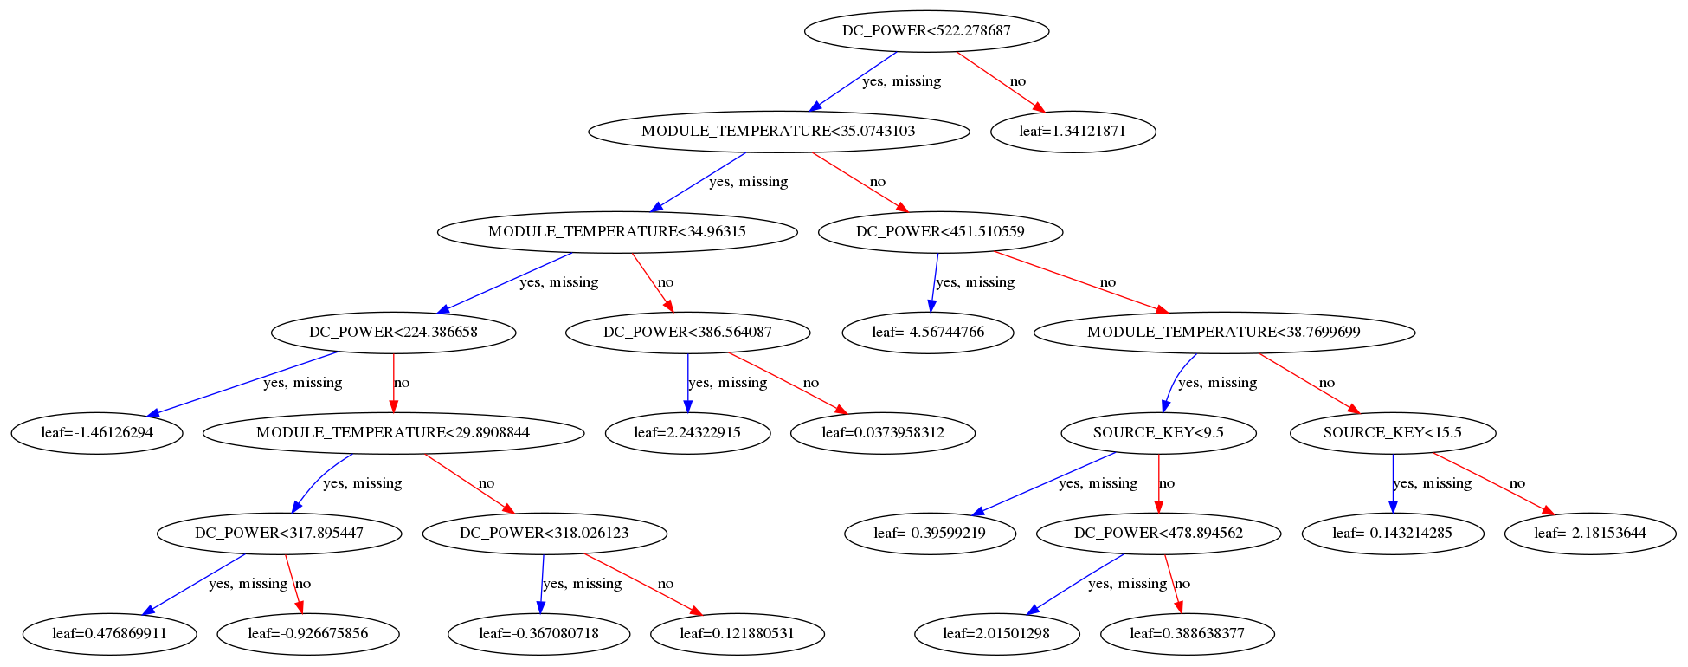

In [54]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgbreg, num_trees=119, ax = ax)
plt.show()

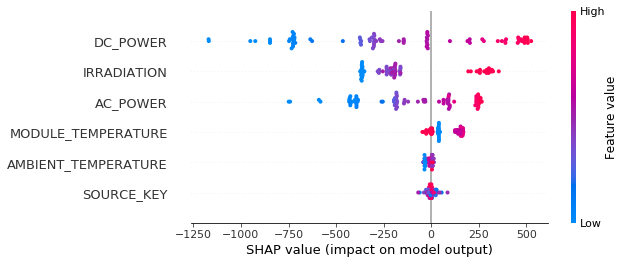

In [83]:
explainer0 = shap.TreeExplainer(xgbreg)
values0 = explainer0.shap_values(X_external)

shap.summary_plot(values0,X_external)

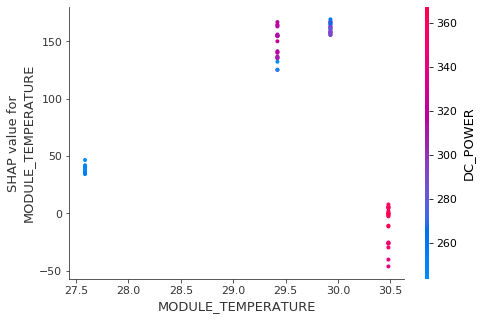

In [90]:
shap.dependence_plot('MODULE_TEMPERATURE',values0,X_external, interaction_index='DC_POWER')

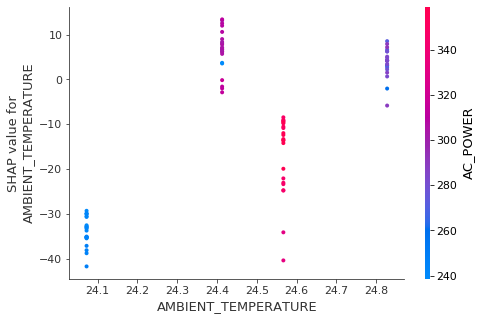

In [92]:
shap.dependence_plot('AMBIENT_TEMPERATURE',values0,X_external, interaction_index='AC_POWER')

# Hypothesis 2:
    HA: It it possible to predict either AC or DC power at given hours of the day using weather data to assume other physical data for the next few days.
    
    H0: It it not enough to provide accurate predictions.

In [70]:
res1_info['SOURCE_KEY'] = label_encoder.fit_transform(res1_info['SOURCE_KEY'])
X1 = res1_info[['SOURCE_KEY','IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','HOUR']]
y1 = res1_info[['AC_POWER']]
data_mat = xgb.DMatrix(data=X1,label=y1)

In [71]:
params = {"objective":"reg:squarederror",'colsample_bytree':0.5,'learning_rate':0.16,
         'max_depth':10,'alpha':10,'min_child_weight':5}

cv_results = xgb.cv(dtrain = data_mat,params=params, nfold=10,
                   num_boost_round=5000,early_stopping_rounds=50,
                   metrics="rmse", as_pandas=True,seed=1)

In [72]:
cv_results.tail()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
54       106.042505        5.088747      129.386457      31.279314
55       105.175085        4.596088      129.242731      31.382095
56       104.693440        4.767598      129.143651      31.402349
57       103.878298        4.407402      129.197785      31.437309
58       103.418413        4.135082      129.140453      31.439326

In [73]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1,y1, test_size=0.2,random_state=0)

In [74]:
reg1 = xgb.XGBRegressor(n_estimators=5000, objective='reg:squarederror',learning_rate=0.16,colsample_bytree = 0.5, max_depth=5, min_child_weight = 5, alpha =10)
reg1.fit(X_tr1, y_tr1, eval_set=[(X_tr1,y_tr1),(X_te1,y_te1)],early_stopping_rounds=50)

[0]	validation_0-rmse:1643.53845	validation_1-rmse:1645.20007
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1387.66138	validation_1-rmse:1388.91467
[2]	validation_0-rmse:1169.90491	validation_1-rmse:1171.17102
[3]	validation_0-rmse:987.46167	validation_1-rmse:989.37878
[4]	validation_0-rmse:839.42859	validation_1-rmse:841.07355
[5]	validation_0-rmse:714.60498	validation_1-rmse:716.23456
[6]	validation_0-rmse:613.08734	validation_1-rmse:615.60461
[7]	validation_0-rmse:529.57239	validation_1-rmse:532.80780
[8]	validation_0-rmse:462.22516	validation_1-rmse:466.45169
[9]	validation_0-rmse:403.13226	validation_1-rmse:407.60031
[10]	validation_0-rmse:355.59973	validation_1-rmse:360.37549
[11]	validation_0-rmse:311.03433	validation_1-rmse:317.59229
[12]	validation_0-rmse:280.12888	validation_1-rmse:287.35132
[13]	validation_0-rmse:254.98238	validation_1-rmse:2

[132]	validation_0-rmse:112.73080	validation_1-rmse:149.29465
[133]	validation_0-rmse:112.66132	validation_1-rmse:149.27470
[134]	validation_0-rmse:112.61830	validation_1-rmse:149.28755
[135]	validation_0-rmse:112.37296	validation_1-rmse:149.45485
[136]	validation_0-rmse:112.31128	validation_1-rmse:149.39651
[137]	validation_0-rmse:112.25491	validation_1-rmse:149.33954
[138]	validation_0-rmse:111.48515	validation_1-rmse:149.55003
[139]	validation_0-rmse:111.45839	validation_1-rmse:149.57340
[140]	validation_0-rmse:111.40777	validation_1-rmse:149.57826
[141]	validation_0-rmse:111.37615	validation_1-rmse:149.54823
[142]	validation_0-rmse:111.30298	validation_1-rmse:149.55774
[143]	validation_0-rmse:111.25937	validation_1-rmse:149.55899
[144]	validation_0-rmse:111.24088	validation_1-rmse:149.53326
[145]	validation_0-rmse:111.17891	validation_1-rmse:149.53664
[146]	validation_0-rmse:111.08074	validation_1-rmse:149.43368
[147]	validation_0-rmse:111.02254	validation_1-rmse:149.35663
[148]	va

[265]	validation_0-rmse:105.38821	validation_1-rmse:147.64098
[266]	validation_0-rmse:105.26905	validation_1-rmse:147.65192
[267]	validation_0-rmse:105.26409	validation_1-rmse:147.64752
[268]	validation_0-rmse:105.25658	validation_1-rmse:147.64182
[269]	validation_0-rmse:105.23807	validation_1-rmse:147.65013
[270]	validation_0-rmse:105.22367	validation_1-rmse:147.64136
[271]	validation_0-rmse:105.22101	validation_1-rmse:147.63232
[272]	validation_0-rmse:105.21600	validation_1-rmse:147.62796
[273]	validation_0-rmse:105.13126	validation_1-rmse:147.56438
[274]	validation_0-rmse:105.12167	validation_1-rmse:147.55815
[275]	validation_0-rmse:105.12014	validation_1-rmse:147.56131
[276]	validation_0-rmse:105.09888	validation_1-rmse:147.53728
[277]	validation_0-rmse:105.09402	validation_1-rmse:147.53157
[278]	validation_0-rmse:104.52865	validation_1-rmse:147.16960
[279]	validation_0-rmse:104.29188	validation_1-rmse:147.33176
[280]	validation_0-rmse:104.02559	validation_1-rmse:147.34885
[281]	va

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.16, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
time_preds = reg1.predict(X_te1)
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_te1,time_preds))),r2_score(y_te1,time_preds))

RMSE: 146.92649874802586 0.9907922026179276


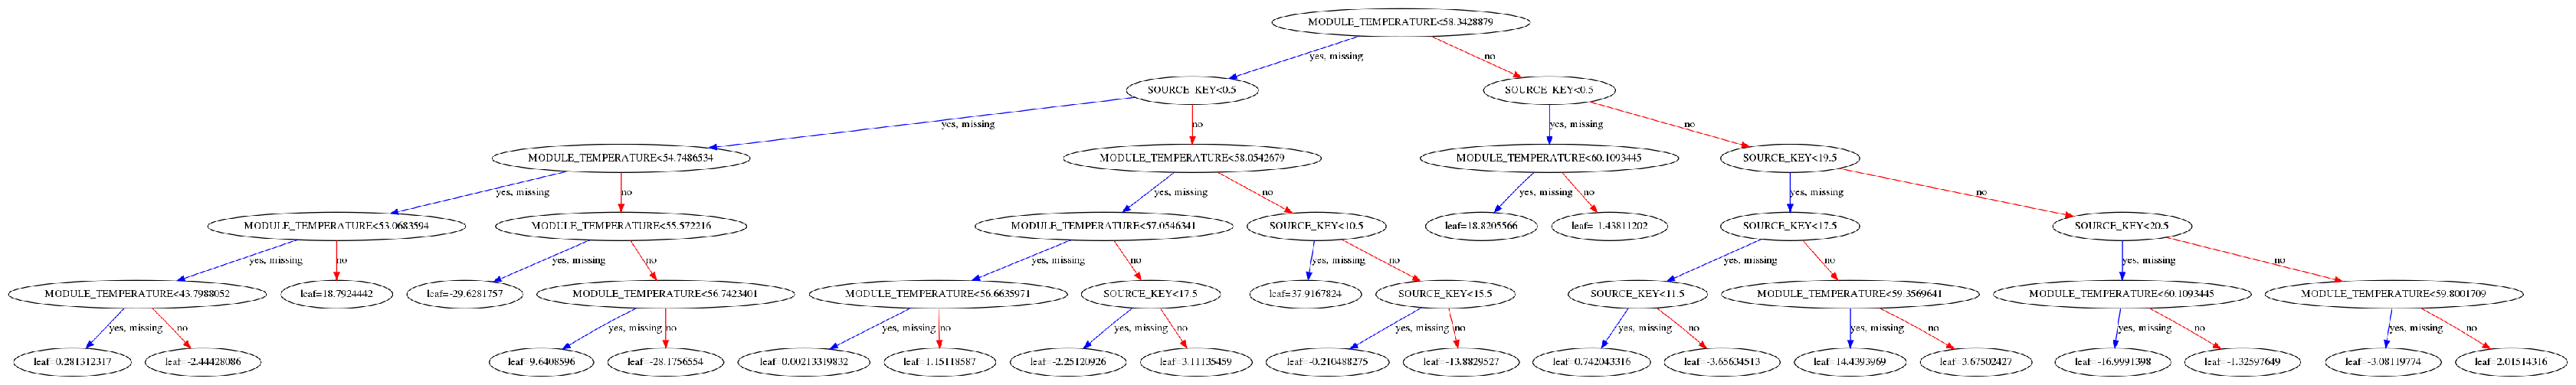

In [76]:
fig, ax = plt.subplots(figsize=(60, 60))
plot_tree(reg1, num_trees=296, ax = ax)
plt.show()

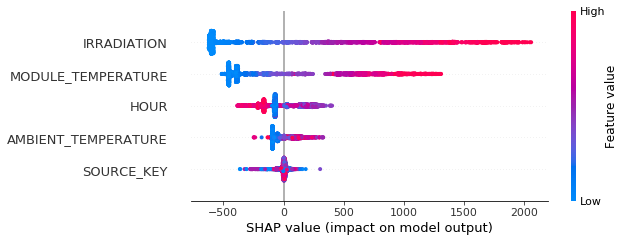

In [79]:
shap_values1 = shap.TreeExplainer(reg1).shap_values(X_te1, check_additivity=False)
shap.summary_plot(shap_values1, X_te1)

# Power station 2
    more to come...

In [54]:
df_gen2 = clean_time2(df_gen2, 'DATE_TIME')
df_wea2 = clean_time2(df_wea2,'DATE_TIME').drop(['SOURCE_KEY'],axis=1)
result2 = pd.merge(df_gen2, df_wea2, how='outer', on=['DATE','HOUR','MINUTE']).dropna()
result2.head(5)


SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD        DATE  \
0  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06  2020-05-15   
1  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09  2020-05-15   
2  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09  2020-05-15   
3  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06  2020-05-15   
4  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07  2020-05-15   

   HOUR  MINUTE  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0     0       0            27.004764           25.060789          0.0  
1     0       0            27.004764           25.060789          0.0  
2     0       0            27.004764           25.060789          0.0  
3     0       0            27.004764           25.060789          0.0  
4     0       0            27.004764           25.060789          0.0

In [55]:
date_list2 = result2.DATE.unique()
gen2_keys = df_gen2.SOURCE_KEY.unique()
def inverter_comp2():
    main_df = pd.DataFrame()
    for day in date_list:
        df = df_gen2[(df_gen2['DATE']== day)][-len(gen2_keys):]
        df = df.drop(['DC_POWER','AC_POWER','TOTAL_YIELD'],axis= 1)
        df = df[df['DAILY_YIELD']!=0]
        main_df = main_df.append(df,ignore_index=True)
    return main_df
inverter_data2 = inverter_comp2()

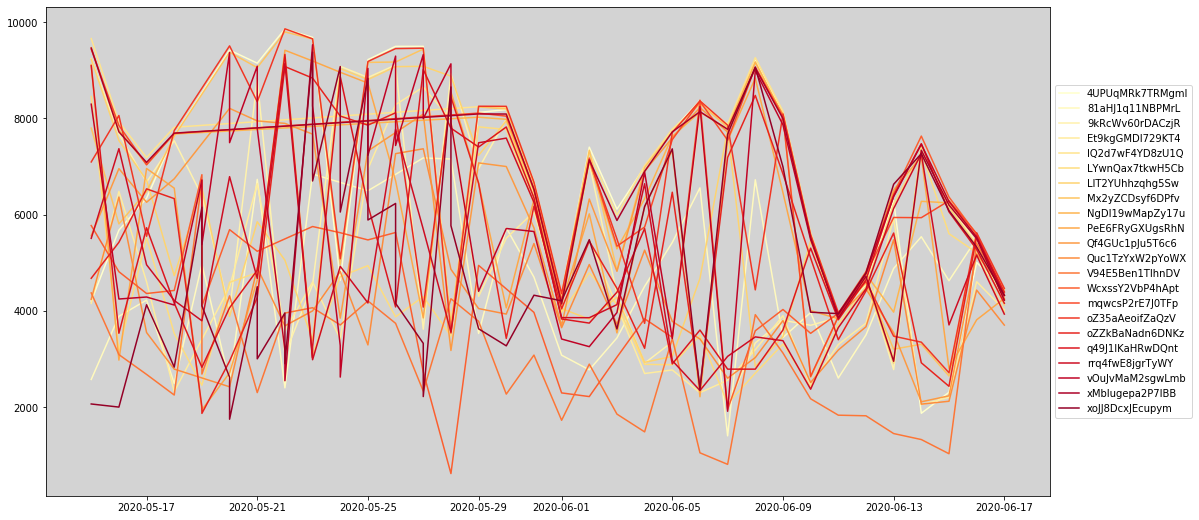

In [56]:
_, ax = plt.subplots(1, 1, figsize=(18, 9))

NUM_colors = len(gen2_keys)
cm = plt.get_cmap('YlOrRd')
ax.set_prop_cycle('color', [cm(1.*i/NUM_colors) for i in range(NUM_colors)])
ax.set_facecolor('lightgray')
for key in gen2_keys:
    df = inverter_data2[inverter_data2['SOURCE_KEY']==key]
    ax.plot(df.DATE,df.DAILY_YIELD,label=key)
plt.legend(loc = 'center left', bbox_to_anchor =(1,0.5))
plt.show()

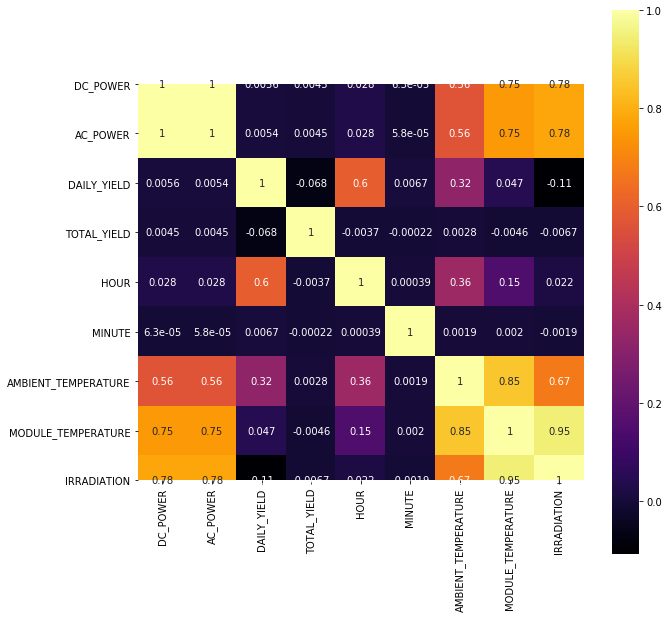

In [57]:
plt.figure(figsize=(10,10))
c = result2.corr(method='pearson')
sns.heatmap(c,cmap='inferno',annot=True,square=True)